# Оптимизация в SciPy

In [3]:
from scipy import optimize as opt  

In [1]:
def rosenbrock(x):# some rosenbrock function
    return .5*(1-x[0])**2 + (x[1]-x[0]**2)**2


print rosenbrock([1,1])#it is minimum of function 

0.0


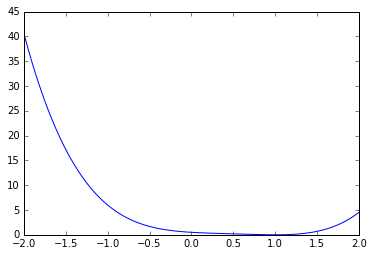

In [9]:
#visualise Rosenbrock minimum
%matplotlib inline
from matplotlib import pylab as plt
import numpy as np

x=[np.arange(-2, 2, 0.0001), np.arange(-2, 2, 0.0001)]
y=rosenbrock(x)
plt.plot(x[1], y)
plt.show()

In [10]:
# lets optimise find minimum
# first aproach - ПЕРЕБОР

reslt=opt.brute(rosenbrock, ((-5,5), (-5,5)))
reslt
#результат есть но долго перебирать               

array([ 0.99999324,  1.00001283])

In [12]:
# если функция плохая ну то есть в ней есть разрывы, 
# может быть она не гладкая, то подойдет дифференциальная эволюция
#Это ГЕНЕТИЧЕСКИЙ АЛГОРИТМ

reslt=opt.differential_evolution(rosenbrock, ((-5,5), (-5,5)))
reslt

     fun: 3.8659110028663935e-20
 message: 'Optimization terminated successfully.'
    nfev: 1983
     nit: 65
 success: True
       x: array([ 1.,  1.])

# Градиент

Для решения градиентных задач используем градиентные функции. При этом в начале мы используем градиент функции Розенброка

In [2]:
import numpy as np

def gr(x):
    return np.array((-2*.5*(1-x[0])-4*x[0]*(x[1]-x[0]**2), 2*(x[1]-x[0]**2)))

In [4]:
# проверим градиент функции с численой оценкой.
# Результат проверки должен быть небольшим числом тогда 
# градиент верен и мы можем его использовать


print opt.check_grad(rosenbrock, gr, [2, 2])

2.38418579102e-07


In [5]:
# Теперь используем градиентную функцию для вычисления минимума.
# Один из популярных градиентных методов — bfgs.
print opt.fmin_bfgs(rosenbrock, [2, 2], fprime=gr)


# т.е. если функция хорошая(без разрывов ) 
# мы можем использовать градиентный подход. 
# Это будет быстрее так в данном случае 16 итераций 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 16
         Function evaluations: 24
         Gradient evaluations: 24
[ 1.00000017  1.00000026]


In [7]:
# Можно использовать функцию MINIMISE она сама определит 
# насколько функция хороша для применения различных подходов 
#

print opt.minimize(rosenbrock, [2, 2])

      fun: 9.538460152507302e-15
 hess_inv: array([[ 0.98632001,  1.97824278],
       [ 1.97824278,  4.46512261]])
      jac: array([  4.74186475e-07,  -1.53939058e-07])
  message: 'Optimization terminated successfully.'
     nfev: 96
      nit: 16
     njev: 24
   status: 0
  success: True
        x: array([ 1.00000007,  1.00000005])


In [10]:
# можем указать метод 
print ("BFGS")
print opt.minimize(rosenbrock, [2, 2], method='BFGS', jac=gr)


print ("Nelder-Mead")
print opt.minimize(rosenbrock, [2, 2], method='Nelder-Mead')


BFGS
      fun: 1.9753570833042e-14
 hess_inv: array([[ 0.98632014,  1.97824322],
       [ 1.97824322,  4.46512386]])
      jac: array([  4.74186625e-07,  -1.53939016e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 16
     njev: 24
   status: 0
  success: True
        x: array([ 1.00000017,  1.00000026])
Nelder-Mead
 final_simplex: (array([[ 0.99998568,  0.99996682],
       [ 1.00002149,  1.00004744],
       [ 1.0000088 ,  1.00003552]]), array([  1.23119954e-10,   2.50768082e-10,   3.59639951e-10]))
           fun: 1.2311995365407462e-10
       message: 'Optimization terminated successfully.'
          nfev: 91
           nit: 46
        status: 0
       success: True
             x: array([ 0.99998568,  0.99996682])
